In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("C:/Users/Tim/Desktop/lighthouse/w4/d2 - mini project iii/mini-project-III-data/twm_customer.csv",sep=';')

In [3]:
#df.dtypes
df.describe()
#df.head()


cust_id         income         age  years_with_bank  nbr_children  \
count  7.470000e+02     747.000000  747.000000       747.000000    747.000000   
mean   1.362991e+06   22728.281124   42.479250         3.907631      0.714859   
std    2.925255e+02   22207.221405   19.114879         2.675634      1.103410   
min    1.362480e+06       0.000000   13.000000         0.000000      0.000000   
25%    1.362732e+06    7118.500000   28.000000         2.000000      0.000000   
50%    1.362993e+06   17242.000000   42.000000         4.000000      0.000000   
75%    1.363244e+06   31338.000000   56.000000         6.000000      1.000000   
max    1.363495e+06  144157.000000   89.000000         9.000000      5.000000   

       marital_status    street_nbr   postal_code  
count      747.000000    747.000000    747.000000  
mean         1.882195   8523.109772  59502.690763  
std          0.892051   5219.488263  31205.926508  
min          1.000000    196.000000   2149.000000  
25%          1.000000   4295.500000  33145.000000  
50%          2.000000   8001.000000  64132.000000  
75%          2.000000  12039.000000  90082.000000  
max          4.000000  19940.000000  98186.000000

In [4]:
def missing(x):
    n_missing = x.isnull().sum().sort_values(ascending=False)
    p_missing = (x.isnull().sum()/x.isnull().count()).sort_values(ascending=False)
    missing_ = pd.concat([n_missing, p_missing],axis=1, keys = ['number','percent'])
    return missing_
missing(df)

number  percent
state_code            0      0.0
city_name             0      0.0
postal_code           0      0.0
street_name           0      0.0
street_nbr            0      0.0
last_name             0      0.0
first_name            0      0.0
name_prefix           0      0.0
marital_status        0      0.0
gender                0      0.0
nbr_children          0      0.0
years_with_bank       0      0.0
age                   0      0.0
income                0      0.0
cust_id               0      0.0

In [5]:
# import geocoder
# #https://stackoverflow.com/questions/52450422/how-to-get-coordinates-from-postal-codes-and-add-them-into-df-using-a-loop

# def get_geocoder(postal_code_from_df):
#      # initialize your variable to None
#     lat_lng_coords = None
#      # loop until you get the coordinates
#     while(lat_lng_coords is None):
#         g = geocoder.google("{}".format(postal_code_from_df))
#         lat_lng_coords = g.latlng
#     latitude = lat_lng_coords[0]
#     longitude = lat_lng_coords[1]
#     return latitude,longitude

# df['Latitude'], df['Longitude'] = get_geocoder(df['postal_code'].values)

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='age', ylabel='income'>

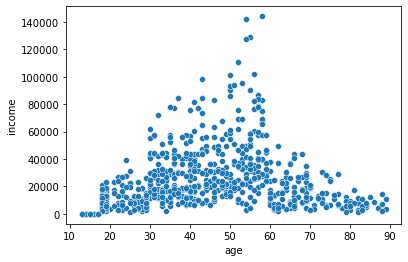

In [7]:
sns.scatterplot(data=df,y='income',x='age')

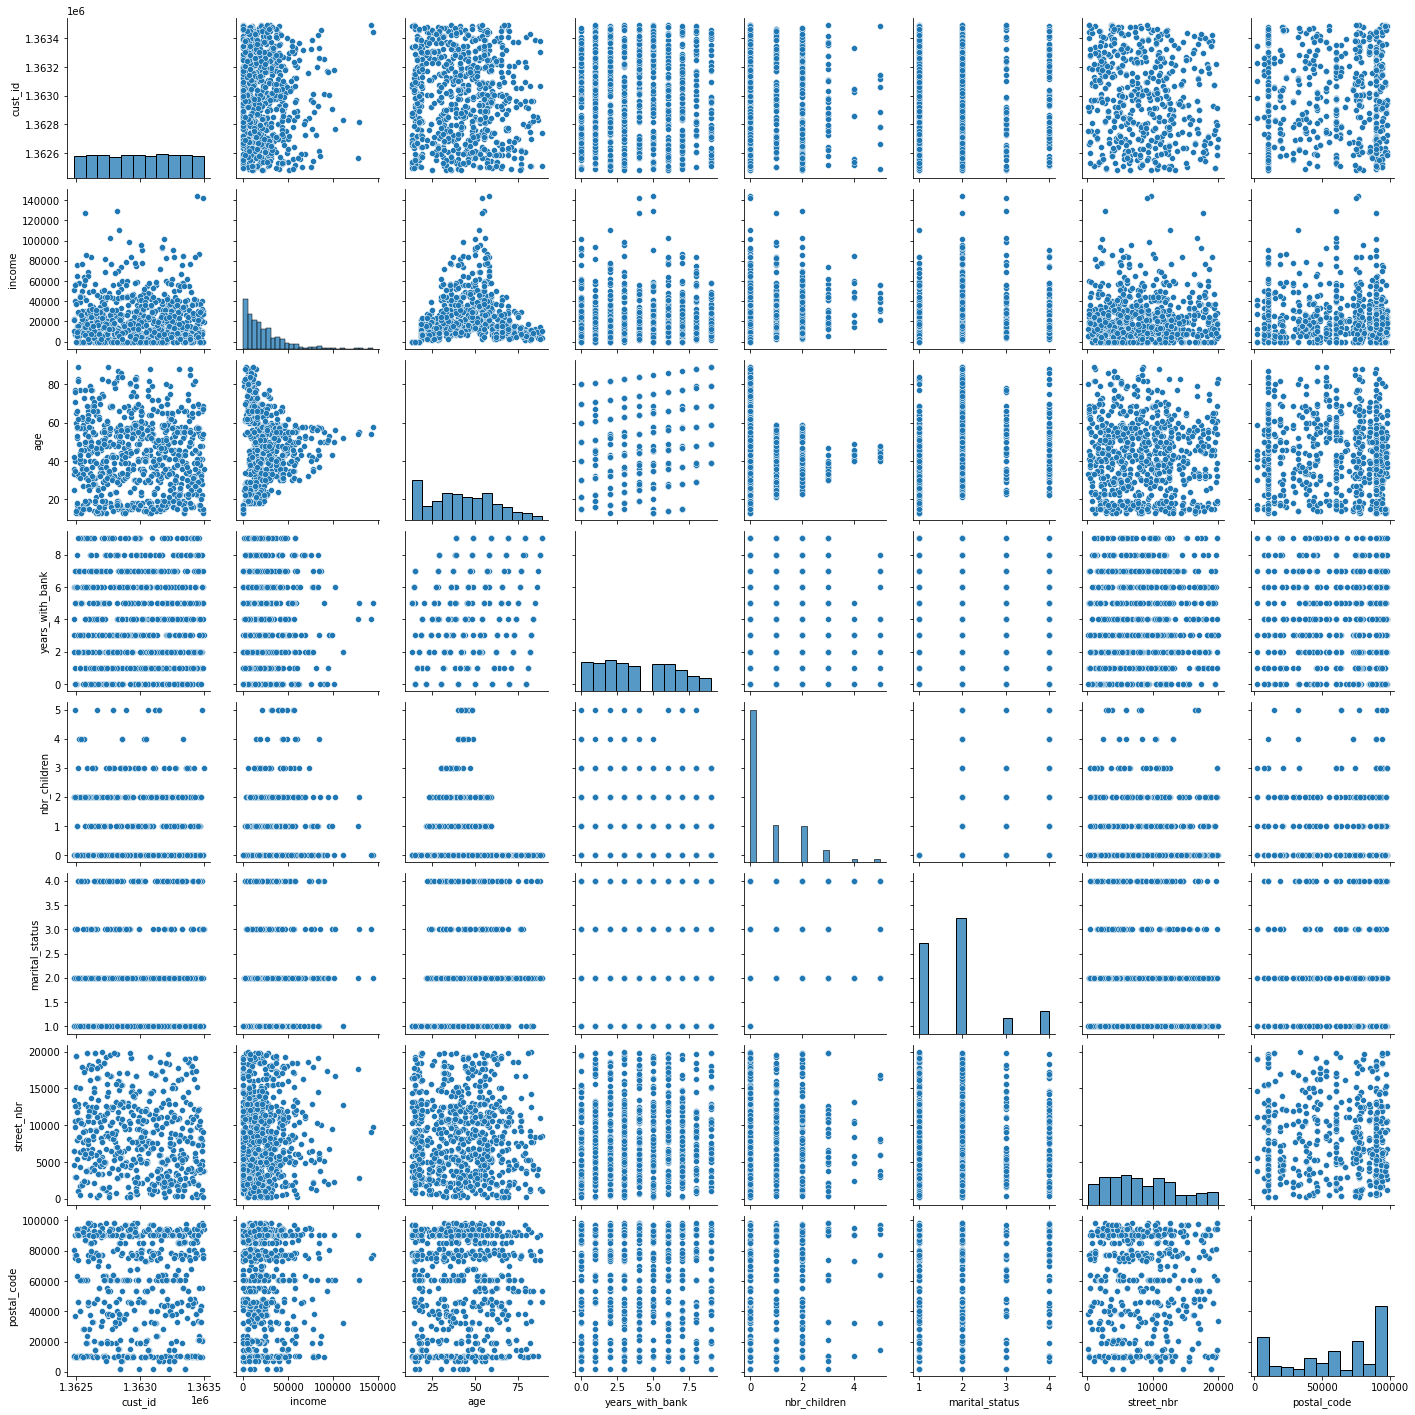

In [6]:
sns.pairplot(df)

<AxesSubplot:>

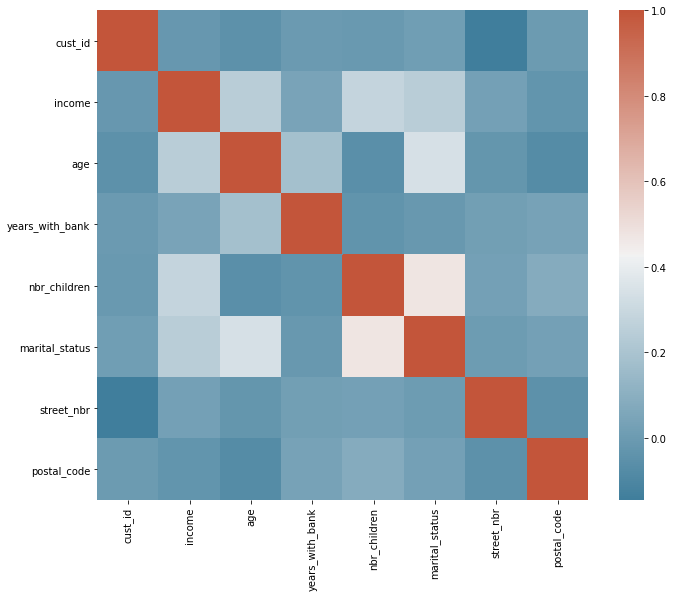

In [13]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(), cmap=cmap)

In [8]:
import copy
data = copy.deepcopy(df)

In [9]:
drop = [
    "years_with_bank",
    "name_prefix",
    "first_name",
    "last_name",
    "street_nbr",
    "street_name",
    "postal_code",
    "city_name",
    "state_code"
]

data = data.drop(columns=drop)

In [10]:
data = pd.concat([data, pd.get_dummies(data['gender'],drop_first=True,dtype=int)],axis=1)

In [11]:
data = data.drop(columns='gender')
data.head()

cust_id  income  age  nbr_children  marital_status  M 
0  1362691   26150   46             1               2   1
1  1362487    6605   71             0               2   1
2  1363160   18548   38             0               1   0
3  1362752   47668   54             0               1   0
4  1362548   44554   59             2               4   0

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data)

data_scale = pd.DataFrame(scaler.transform(data),columns = data.columns)

In [13]:
from sklearn.preprocessing import Normalizer

n = Normalizer()
n.fit(data)
data_norm = pd.DataFrame(n.transform(data),columns = data.columns)

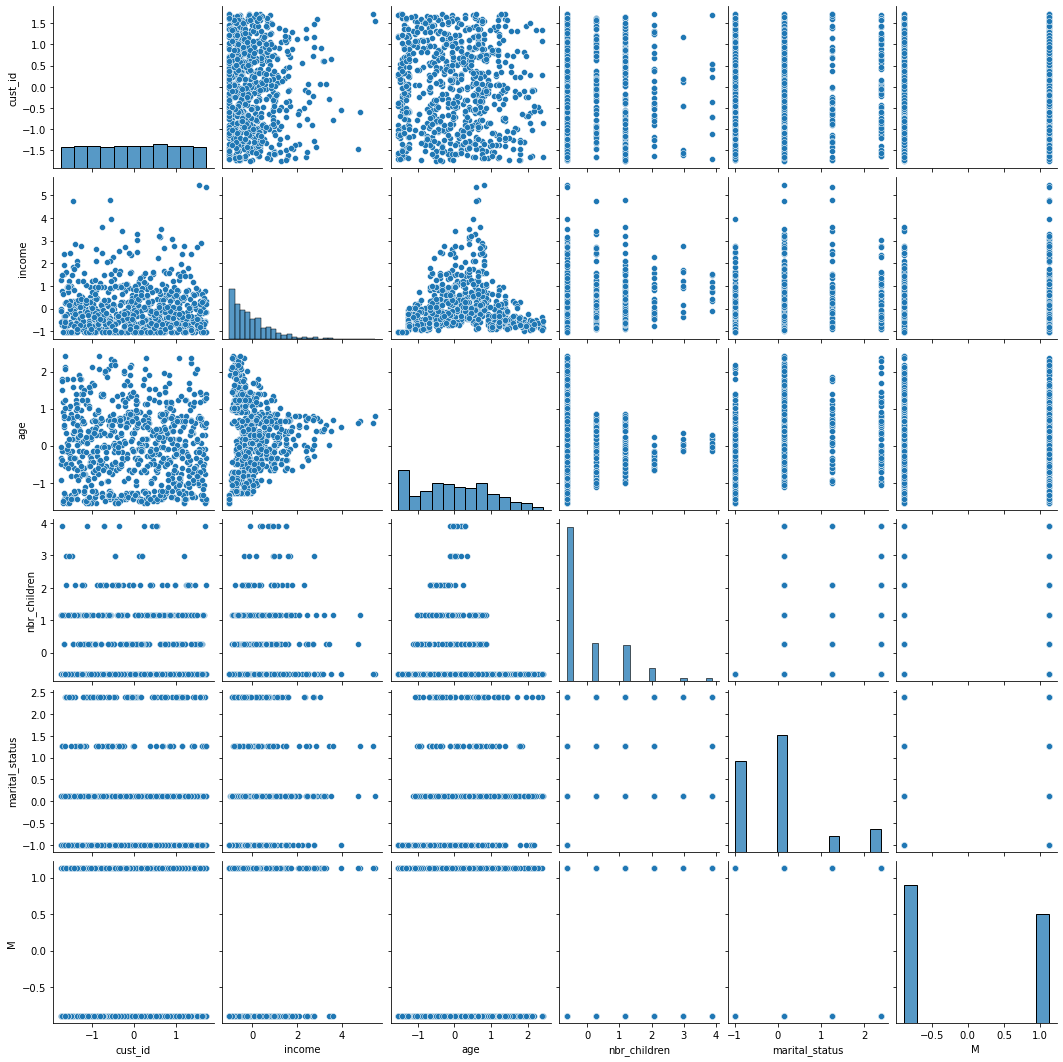

In [20]:
sns.pairplot(data_scale)

<AxesSubplot:>

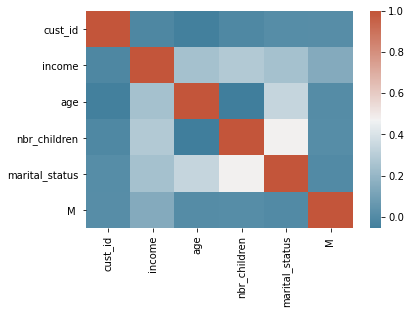

In [21]:
sns.heatmap(data_scale.corr(), cmap=cmap)

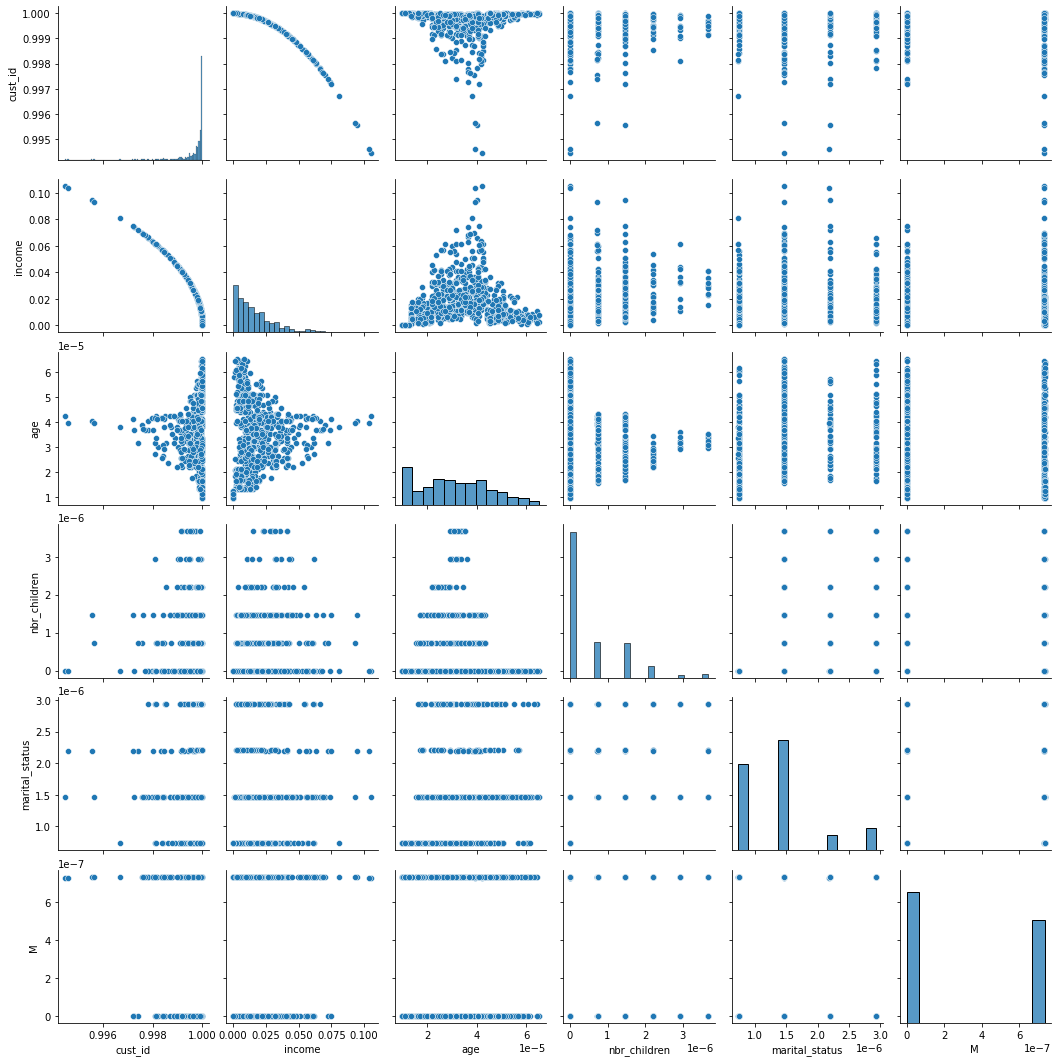

In [21]:
sns.pairplot(data_norm)

<AxesSubplot:>

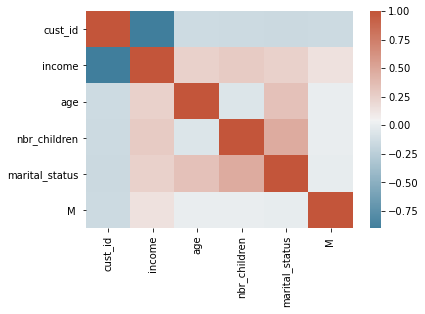

In [22]:
sns.heatmap(data_norm.corr(), cmap=cmap)

In [14]:
import plotly.express as px
from sklearn.decomposition import PCA

n_components = 2
cols = data.columns
pca = PCA(n_components = n_components)
components = pca.fit_transform(data_scale[cols])

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_matrix(
    components,
    labels = labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
    dimensions = range(n_components),
    color = data_scale["income"]
)

for i, feature in enumerate(cols):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
    
fig.update_traces(diagonal_visible=False)
fig.show()

In [24]:
fig = px.scatter(components, x=0, y=1, color=data_scale['income'])

for i, feature in enumerate(cols):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

In [27]:
pca = PCA()
pca.fit(data_scale)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

In [29]:
n_components = 5
pca = PCA(n_components = n_components)
components = pca.fit_transform(data_scale[cols])

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_matrix(
    components,
    labels = labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
    dimensions = range(n_components),
    color = data_scale["income"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [30]:
components.shape

(747, 5)

In [31]:
df_components = pd.DataFrame(components)
df_components.to_csv("df_components.csv")

In [19]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [10]:
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

In [11]:
plot_distortion(components)

NameError: name 'components' is not defined

In [20]:
def silhouette(X,max_clusters = 9):
    distortions = []
    
    for i in range(2, max_clusters +1):
        
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=0).fit(X)
        
        labels = km.labels_
        
        distortions.append((i,metrics.silhouette_score(X, labels, metric='euclidean')))

    return(distortions)

In [62]:
silhouette(components)

[(2, 0.20301901638708011),
 (3, 0.22513611144056228),
 (4, 0.23430779582012215),
 (5, 0.23688229236840122),
 (6, 0.24921430695789107),
 (7, 0.2634355435177844),
 (8, 0.26299444910587294),
 (9, 0.2665303299514062)]

In [119]:
km = KMeans(
    n_clusters = 7,
    n_init = 10,
    random_state = 0
)

y_km = km.fit_predict(components)

In [12]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='.',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

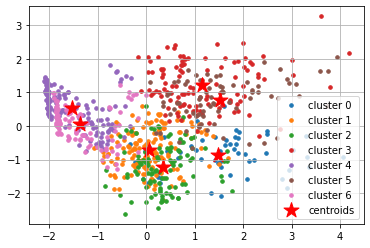

In [121]:
plot_clusters(components, y_km, plt_cluster_centers= True)

In [84]:
km = KMeans(
    n_clusters = 3,
    n_init = 10,
    random_state = 0
)

y_km = km.fit_predict(components)

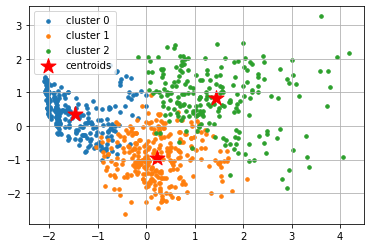

In [85]:
plot_clusters(components, y_km, plt_cluster_centers= True)

In [193]:
data.dtypes

cust_id           int64
income            int64
age               int64
nbr_children      int64
marital_status    int64
M                 int32
dtype: object

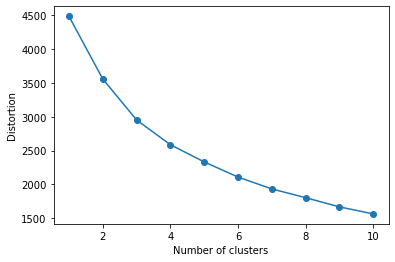

In [17]:
plot_distortion(data_scale)

In [21]:
silhouette(data_scale)

[(2, 0.19152528001484462),
 (3, 0.21701000567093418),
 (4, 0.22133380320005946),
 (5, 0.22136858598636097),
 (6, 0.23290975830161836),
 (7, 0.24627847272424805),
 (8, 0.25195353248266994),
 (9, 0.25056143259821495)]

In [27]:
km = KMeans(
    n_clusters = 4,
    n_init = 10,
    random_state = 0
)

y_km = km.fit_predict(data_scale)

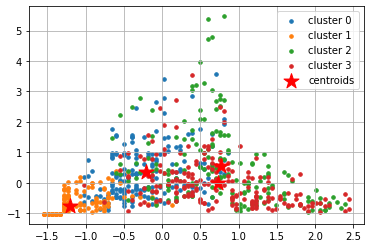

In [28]:
scaleda = data_scale[['age','income']]
A = scaleda.values
plot_clusters(A, y_km, plt_cluster_centers=True)

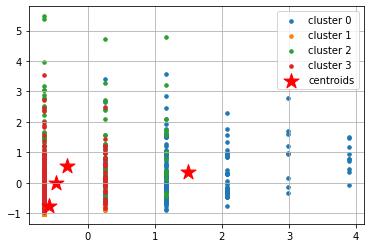

In [29]:
scaledc = data_scale[['nbr_children','income']]
B = scaledc.values
plot_clusters(B, y_km, plt_cluster_centers=True)

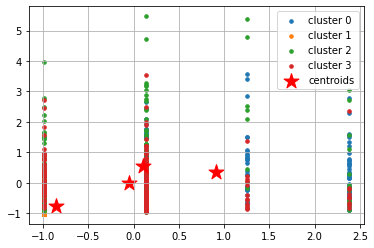

In [30]:
scaledm = data_scale[['marital_status','income']]
C = scaledm.values
plot_clusters(C, y_km, plt_cluster_centers=True)

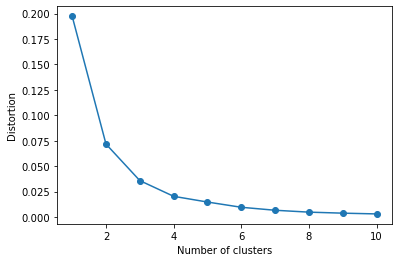

In [167]:
plot_distortion(data_norm)

In [168]:
silhouette(data_norm)

[(2, 0.6463640487592514),
 (3, 0.5944511203849009),
 (4, 0.585663899587357),
 (5, 0.5868194373914956),
 (6, 0.5659467553766593),
 (7, 0.5667571430847076),
 (8, 0.5925981956580493),
 (9, 0.5929314229775969)]

In [206]:
km2 = KMeans(
    n_clusters = 4,
    n_init = 10,
    random_state = 0
)

y_km2 = km2.fit_predict(data_norm)

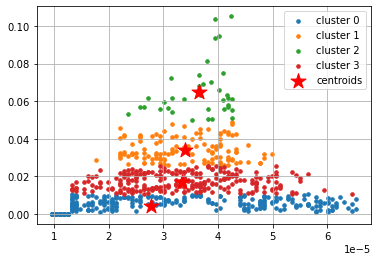

In [207]:
dn = data_norm[['age','income']]
A2 = dn.values
plot_clusters(A2, y_km2, plt_cluster_centers=True)

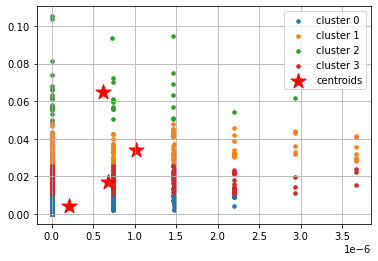

In [208]:
nc = data_norm[['nbr_children','income']]
B2 = nc.values
plot_clusters(B2, y_km2, plt_cluster_centers=True)

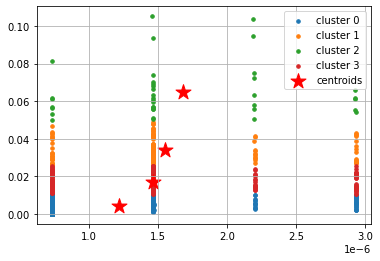

In [209]:
mc = data_norm[['marital_status','income']]
C2 = mc.values
plot_clusters(C2, y_km2, plt_cluster_centers=True)

In [212]:
data_scale_final['cluster'] = km.fit_predict(data_scale)
data_scale_final

cust_id    income       age  nbr_children  marital_status        M   \
0   -1.025744  0.154185  0.184312      0.258591        0.132149  1.127172   
1   -1.723586 -0.726524  1.493070     -0.648298        0.132149  1.127172   
2    0.578609 -0.188366 -0.234490     -0.648298       -0.989614 -0.887176   
3   -0.817076  1.123798  0.603115     -0.648298       -0.989614 -0.887176   
4   -1.514918  0.983479  0.864867      1.165479        2.375675 -0.887176   
..        ...       ...       ...           ...             ...       ...   
742  1.139620 -0.357478 -0.339191      0.258591        2.375675 -0.887176   
743 -0.327902  0.164864  0.707816      0.258591        0.132149  1.127172   
744 -1.443081  1.738064  0.393714      1.165479        0.132149  1.127172   
745  1.276451 -0.343735 -0.286841     -0.648298        0.132149 -0.887176   
746  1.067783 -0.218692 -1.281497     -0.648298       -0.989614 -0.887176   

     cluster  
0          1  
1          1  
2          0  
3          5  
4          2  
..       ...  
742        2  
743        1  
744        3  
745        0  
746        0  

[747 rows x 7 columns]

In [214]:
data_scale_final.groupby('cluster')['income'].count()

cluster
0    137
1    119
2    165
3     59
4    107
5    160
Name: income, dtype: int64

In [215]:
data_scale_final['cluster'].value_counts()

2    165
5    160
0    137
1    119
4    107
3     59
Name: cluster, dtype: int64

In [216]:
df_radar = data_scale_final.groupby('cluster').mean().divide(data_scale_final.drop('cluster',axis=1).mean())*100

import plotly.graph_objects as go

def plot_radar_chart(df):
    data = []
    for i in range(0,len(df)):
        data.append(go.Scatterpolar(r = df.iloc[i].values,
                                    theta = df.iloc[i].index,
                                    name = f'cluster_{df.index[i]}',
                                    fill = 'toself'))
    # mean line
    data.append(go.Scatterpolar(r = [100]* df.shape[1],
                                theta= df.columns,
                                name = 'mean',
                                fill = 'toself'))
    layout = go.Layout(polar = dict(radialaxis = dict(visible = True)),
                       showlegend = True)
    fig = go.Figure(data = data, layout = layout)
    fig.show()

plot_radar_chart(df_radar)

In [ ]:
#test area

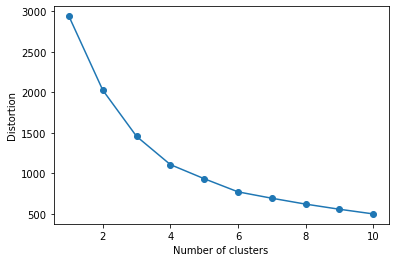

In [55]:
Model = PCA(n_components = 3)
X_new = Model.fit_transform(data_scale[cols])
plot_distortion(X_new)

In [56]:
silhouette(X_new)

[(2, 0.28983603846847766),
 (3, 0.31908469732925326),
 (4, 0.3456869429073417),
 (5, 0.35119860569111877),
 (6, 0.37008757693021765),
 (7, 0.37383699650341434),
 (8, 0.3744933374156323),
 (9, 0.3787188734710702)]

In [59]:
km = KMeans(
    n_clusters = 6,
    n_init = 10,
    random_state = 0
)

y_test = km.fit_predict(df_components)

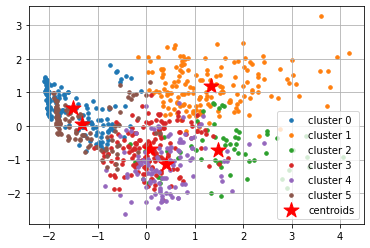

In [60]:
plot_clusters(X_new, y_test, plt_cluster_centers= True)